<a href="https://colab.research.google.com/github/fatmaram/AI-Engineering-Project-Beginner-Series/blob/main/HeartFailurePrediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
!pip install -q kaggle

In [59]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"fatumaramadhan","key":"025c61714aaf27d67bc356781feca261"}'}

In [60]:
! cp kaggle.json ~/.kaggle/

In [61]:
! chmod 600 ~/.kaggle/kaggle.json

In [62]:
import os
print(os.listdir())


['.config', 'kaggle (2).json', 'kaggle (1).json', 'kaggle.json', 'data', 'sample_data']


In [63]:
!kaggle datasets download -d johnsmith88/heart-disease-dataset -p data


Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
License(s): unknown
heart-disease-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [64]:
import zipfile

with zipfile.ZipFile("data/heart-disease-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("data")


In [65]:
import pandas as pd

df = pd.read_csv("data/heart.csv")
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [66]:
dataset = pd.read_csv("data/heart.csv")
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [67]:
print(x[1])

[ 53.    1.    0.  140.  203.    1.    0.  155.    1.    3.1   0.    0.
   3. ]


In [68]:
print(y)

[0 0 0 ... 0 1 0]


In [69]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le6 = LabelEncoder()
le8 = LabelEncoder()
le10 = LabelEncoder()
x[:,1] = le1.fit_transform(x[:,1])
x[:,2] = le2.fit_transform(x[:,2])
x[:,6] = le6.fit_transform(x[:,6])
x[:,8] = le8.fit_transform(x[:,8])
x[:,10] = le10.fit_transform(x[:,10])

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [72]:
print(X_test)

[[-1.03300622  0.71228712  1.09476414 ...  1.10494968 -0.69359871
  -0.55300244]
 [ 0.47193177 -1.40392824  0.09731237 ...  1.10494968  1.36709311
  -0.55300244]
 [ 1.00940963  0.71228712 -0.9001394  ...  1.10494968  1.36709311
   1.04369474]
 ...
 [-1.14050179 -1.40392824  1.09476414 ... -0.46806896 -0.69359871
  -0.55300244]
 [ 1.33189634 -1.40392824 -0.9001394  ... -0.46806896  1.36709311
   1.04369474]
 [ 1.86937419 -1.40392824 -0.9001394  ... -0.46806896 -0.69359871
  -0.55300244]]


In [73]:
from sklearn.ensemble import RandomForestClassifier
model_randomforest = RandomForestClassifier()
model_randomforest.fit(X_train,Y_train)



RandomForestClassifier()

In [74]:
from sklearn.neighbors import KNeighborsClassifier
model_kneighbors = KNeighborsClassifier()
model_kneighbors.fit(X_train,Y_train)

KNeighborsClassifier()

In [75]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train,Y_train)

LogisticRegression()

In [76]:
from sklearn.tree import DecisionTreeClassifier
model_decision = DecisionTreeClassifier()
model_decision.fit(X_train,Y_train)

DecisionTreeClassifier()

In [77]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [78]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train,Y_train)

SVC()

In [79]:
from sklearn.metrics import confusion_matrix , accuracy_score
# cm = confusion_matrix(Y_test,y_pred_random)
# print(cm)

In [80]:
y_pred_logistic = model_logistic.predict(X_test)
y_pred_neighbors = model_kneighbors.predict(X_test)
y_pred_svm = model_svm.predict(X_test)
y_pred_decision = model_decision.predict(X_test)
y_pred_random = model_randomforest.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)

In [81]:
RandomForest_Accuracy = accuracy_score(Y_test,y_pred_random)
LogisticRegression_Accuracy = accuracy_score(Y_test,y_pred_logistic)
KNeighbors_Accuracy = accuracy_score(Y_test,y_pred_neighbors)
SVM_Accuracy = accuracy_score(Y_test,y_pred_svm)
Decision_Accuracy = accuracy_score(Y_test,y_pred_decision)
XGBoost_Accuracy = accuracy_score(Y_test,y_pred_xgb)

Text(0, 0.5, 'Accuracy')

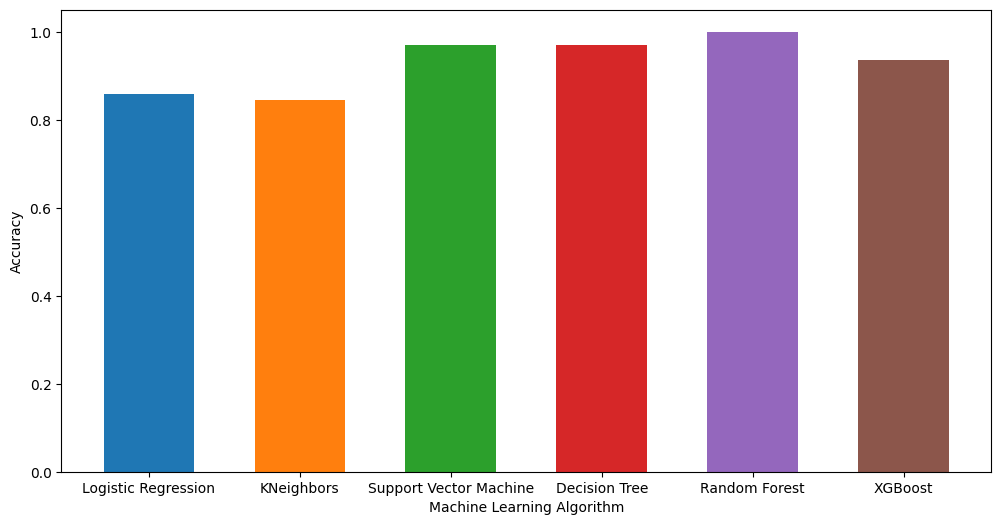

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar("Logistic Regression",LogisticRegression_Accuracy,width=0.6)
plt.bar("KNeighbors",KNeighbors_Accuracy,width=0.6)
plt.bar("Support Vector Machine",SVM_Accuracy,width=0.6)
plt.bar("Decision Tree",Decision_Accuracy,width=0.6)
plt.bar("Random Forest",RandomForest_Accuracy,width=0.6)
plt.bar("XGBoost",XGBoost_Accuracy,width=0.6)
plt.xlabel("Machine Learning Algorithm")
plt.ylabel("Accuracy")

In [83]:
models = []
models.append(('DTree', DecisionTreeClassifier()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Support Machines', SVC(gamma = 'auto')))
models.append(('LR', LogisticRegression(max_iter=1000)))

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Create a for loop so that each model is tested in turn
for name, model in models:
  # Here we do a 10 split K-FOLD
  from sklearn.model_selection import cross_val_score, KFold
  kfold = KFold(n_splits = 10, random_state=42, shuffle=True)
  # We get the results for each Fold
  cv_results = cross_val_score(model, X_train, Y_train, cv = kfold,
  scoring='accuracy')
  # Get the average of all Folds
  print('Model Name: ', name, ' Results: ', cv_results.mean())


Model Name:  DTree  Results:  0.9902439024390244
Model Name:  KNC  Results:  0.8195121951219513
Model Name:  Random Forest  Results:  0.9878048780487806
Model Name:  Support Machines  Results:  0.9048780487804879
Model Name:  LR  Results:  0.8426829268292682


In [84]:
# Example with 13 features (replace with real values in correct order)
sample_input = [[40, 1, 2, 110, 290, 1, 2, 160, 0, 2.2, 1, 0, 2]]

result = model_randomforest.predict(sc.transform(sample_input))

if result == [0]:
    print('Person Not Having Heart Disease')
else:
    print("Person Having Heart Disease")


Person Having Heart Disease
